# (MBTI 별 Data 모으기: 생략) MBTI file 불러오기

In [250]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from collections import Counter

In [251]:
mbti=pd.read_csv('.\data\\training\\mbti.csv')

# Tokenize and Stemming


In [252]:
X_data = mbti['posts'].ravel()
y_data = mbti['type'].ravel()

print("normalize 시작")
normalized_text = []
for sentence in X_data: #for sentence in X_data.ravel()
    rm_urls = re.sub(r'http[s]?://\S+', '', sentence)
    clean_sentence = re.sub('[^A-Za-z\s]+', '', rm_urls.lower())
    normalized_text.append(clean_sentence)
X_data = normalized_text
print("normalize 완료")

normalize 시작
normalize 완료


In [253]:
import nltk
import numpy as np
from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils



In [254]:
ps=PorterStemmer()

stop_words = set(stopwords.words('english'))

print("stemming 시작")
stemData=[]
for sentence in X_data:
    tokenData = nltk.word_tokenize(sentence)
    tempData = []
    for word in tokenData:
        if word not in stop_words:
            tempData.append(ps.stem(word))
    stemData.append(tempData)
print("stemming 완료")
stemData = np.array(stemData)


stemming 시작
stemming 완료


In [255]:
max_features = 10000

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(stemData)
X = tokenizer.texts_to_sequences(stemData)

max_seq_length = np.max([len(text) for text in stemData])
print(max_seq_length)
X = pad_sequences(X)

print(nb_features)
print(X.shape)
print(X)


950
10000
(8675, 883)
[[   0    0    0 ...   60   63   22]
 [   0    0    0 ...  293  202    6]
 [   0    0    0 ...   33  559  591]
 ...
 [   0    0    0 ...  375   90  148]
 [   0    0    0 ... 1827  334 1455]
 [   0    0    0 ...  126   45   49]]


In [256]:
lb = LabelEncoder()
y = np.array(y_data)
y = lb.fit_transform(y)
y = np_utils.to_categorical(y)

print(y)
print(y.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(8675, 16)


# Data balancing 

In [267]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

print(y.shape)
X_resampled, y_resampled = SMOTE(random_state=0).fit_sample(X, y)
#format(Counter(y_resampled))
print(y_resampled.shape)



# Garbage Collection 1

In [162]:
import gc

'''del [[mbti]]

del sentence

del [[dataCombine]]

del [condition]

for ownsentence in allData:
    del ownsentence
del allData

for tokenData in tokenizedData:   # delete 'stemData'
    for data in tokenData:
        del data
    del tokenData
del tokenizedData

for clean_sentence in normalized_text:
    del clean_sentence
del normalized_text

del X_data

del tokenData
del tempData

del sentence

gc.collect()'''

"del [[mbti]]\n\ndel sentence\n\ndel [[dataCombine]]\n\ndel [condition]\n\nfor ownsentence in allData:\n    del ownsentence\ndel allData\n\nfor tokenData in tokenizedData:   # delete 'stemData'\n    for data in tokenData:\n        del data\n    del tokenData\ndel tokenizedData\n\nfor clean_sentence in normalized_text:\n    del clean_sentence\ndel normalized_text\n\ndel X_data\n\ndel tokenData\ndel tempData\n\ndel sentence\n\ngc.collect()"

In [248]:
import tensorflow as tf
from keras.utils import np_utils
from tensorflow import keras

from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size= 0.3, random_state=1234)

#n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

print(X_train.shape)
print(y_train.shape)

X_train = np.expand_dims(X_train, 2)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
print(X_train.shape[1])

model = Sequential()
model.add(Embedding(max_features, 128))
#model.add(Embedding(max_features, 128, max_seq_length))
model.add(LSTM(128, batch_input_shape=(None, X_train.shape[1])))
model.add(Dense(16, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split = 0.2)

(6072, 883)
(6072, 16)
(6072, 883, 1)
883
Epoch 1/5
152/152 [==============================] - 86s 567ms/step - loss: 2.3407 - accuracy: 0.1888 - val_loss: 2.2888 - val_accuracy: 0.2247
Epoch 2/5
152/152 [==============================] - 92s 603ms/step - loss: 2.2181 - accuracy: 0.2625 - val_loss: 2.2990 - val_accuracy: 0.2123
Epoch 3/5
152/152 [==============================] - 90s 593ms/step - loss: 1.7671 - accuracy: 0.4497 - val_loss: 2.4711 - val_accuracy: 0.2165
Epoch 4/5
152/152 [==============================] - 91s 596ms/step - loss: 1.2151 - accuracy: 0.6308 - val_loss: 2.7689 - val_accuracy: 0.2115
Epoch 5/5
152/152 [==============================] - 90s 592ms/step - loss: 0.7827 - accuracy: 0.7694 - val_loss: 3.2663 - val_accuracy: 0.1959


In [259]:
model.save('.\\models\\LSTM_undersample.h5')

OSError: Unable to create file (unable to open file: name = '.\models\LSTM_undersample.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

In [260]:
model.summary()

Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_92 (Embedding)     (None, None, 128)         1280000   
_________________________________________________________________
lstm_88 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_88 (Dense)             (None, 16)                2064      
Total params: 1,413,648
Trainable params: 1,413,648
Non-trainable params: 0
_________________________________________________________________


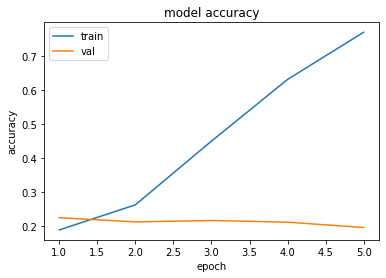

In [263]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

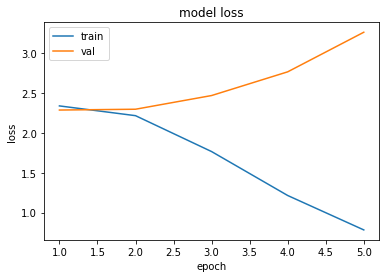

In [265]:
epochs = range(1, len(history.history['val_accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [266]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

82/82 [==============================] - 12s 148ms/step - loss: 3.3416 - accuracy: 0.1975
